In [ ]:
! pip install dalex
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
import pickle
import xgboost
import dalex as dx
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

0. For the selected data set, train at least one tree-based ensemble model, e.g. random forest, gbdt, xgboost.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
p = "/content/drive/MyDrive/Colab Notebooks/XAI/"
#p = "../HW3/AnnaSemik/"

X_train = pd.read_csv(p+"X_train.csv", index_col=0)
X_test = pd.read_csv(p+"X_test.csv", index_col=0)
y_train = np.array(pd.read_csv(p+"y_train.csv", index_col=0)).reshape(-1,)
y_test = np.array(pd.read_csv(p+"y_test.csv", index_col=0)).reshape(-1,)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8639054289926549


1. Calculate Permutation-based Variable Importance for the selected model.

In [ ]:
def pr(model, df):
    df.loc[:, df.dtypes == 'object'] =\
        df.select_dtypes(['object'])\
        .apply(lambda x: x.astype('category'))
    return model.predict(df)

explainer = dx.Explainer(model, X_test, y_test, predict_function=pr)
pvi = explainer.model_parts(random_state=0)
pvi.result

Preparation of a new explainer is initiated

  -> data              : 99 rows 32 cols
  -> target variable   : 99 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function pr at 0x7fdfce1a6280> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.38, mean = 9.88, max = 18.9
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -8.1, mean = -0.049, max = 7.07
  -> model_info        : package sklearn

A new explainer has been created!


,variable,dropout_loss,label
0,Fedu,1.766216,RandomForestRegressor
1,paid,1.767837,RandomForestRegressor
2,romantic,1.770756,RandomForestRegressor
3,goout,1.771033,RandomForestRegressor
4,Dalc,1.771429,RandomForestRegressor
5,studytime,1.773531,RandomForestRegressor
6,Medu,1.774175,RandomForestRegressor
7,famrel,1.776038,RandomForestRegressor
8,address,1.777246,RandomForestRegressor
9,freetime,1.777631,RandomForestRegressor


In [ ]:
pvi.plot(show=False)

2. Train three more candidate models (different variable transformations, different model architectures, hyperparameters) and compare their rankings of important features using PVI. What are the differences? Why?

In [ ]:
X_train_1, X_test_1 = X_train.drop(labels=["G1", "G2"], axis=1), X_test.drop(labels=["G1", "G2"], axis=1)
model1 = RandomForestRegressor()
model1.fit(X_train_1, y_train)
print(model1.score(X_test_1, y_test))

0.35700536888015244


In [ ]:
explainer1 = dx.Explainer(model1, X_test_1, y_test, predict_function=pr)
pvi1 = explainer1.model_parts(random_state=0)
pvi1.result

Preparation of a new explainer is initiated

  -> data              : 99 rows 30 cols
  -> target variable   : 99 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function pr at 0x7fdfce1a6280> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 2.59, mean = 10.4, max = 15.9
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -14.0, mean = -0.534, max = 8.34
  -> model_info        : package sklearn

A new explainer has been created!


,variable,dropout_loss,label
0,Medu,3.819656,RandomForestRegressor
1,age,3.837648,RandomForestRegressor
2,nursery,3.854641,RandomForestRegressor
3,Fedu,3.858058,RandomForestRegressor
4,famrel,3.859051,RandomForestRegressor
5,Pstatus,3.860678,RandomForestRegressor
6,address,3.863132,RandomForestRegressor
7,Walc,3.865538,RandomForestRegressor
8,_full_model_,3.866752,RandomForestRegressor
9,Fjob,3.866928,RandomForestRegressor


In [ ]:
pvi1.plot(show=False)

In [ ]:
model2 = RandomForestRegressor(max_depth = 3, n_estimators = 100, min_samples_split = 5, min_samples_leaf = 5, bootstrap = False)
model2.fit(X_train, y_train)
print(model2.score(X_test, y_test))

explainer2 = dx.Explainer(model2, X_test, y_test, predict_function=pr)
pvi2 = explainer2.model_parts(random_state=0)
pvi2.result

0.8454398841738314
Preparation of a new explainer is initiated

  -> data              : 99 rows 32 cols
  -> target variable   : 99 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function pr at 0x7fdfce1a6280> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.333, mean = 9.97, max = 18.3
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -6.62, mean = -0.137, max = 7.67
  -> model_info        : package sklearn

A new explainer has been created!


,variable,dropout_loss,label
0,Dalc,1.895795,RandomForestRegressor
1,sex,1.895795,RandomForestRegressor
2,schoolsup,1.895795,RandomForestRegressor
3,school,1.895795,RandomForestRegressor
4,romantic,1.895795,RandomForestRegressor
5,reason,1.895795,RandomForestRegressor
6,paid,1.895795,RandomForestRegressor
7,nursery,1.895795,RandomForestRegressor
8,internet,1.895795,RandomForestRegressor
9,higher,1.895795,RandomForestRegressor


In [ ]:
pvi2.plot(show=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
model3_ = RandomForestRegressor()
params = {'criterion': ["squared_error", "absolute_error", "poisson"],
          'max_depth': range(3,10),
          'n_estimators': [100, 500, 1000]}
model3 = GridSearchCV(estimator=model3_, param_grid=params)

model3.fit(X_train, y_train);
print(model3.score(X_test, y_test))

explainer3 = dx.Explainer(model3, X_test, y_test, predict_function=pr)
pvi3 = explainer3.model_parts(random_state=0)
pvi3.result

0.8171767913086974
Preparation of a new explainer is initiated

  -> data              : 99 rows 32 cols
  -> target variable   : 99 values
  -> model_class       : sklearn.model_selection._search.GridSearchCV (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function pr at 0x7fdfce1a6280> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.1, mean = 9.88, max = 18.8
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -9.96, mean = -0.0518, max = 6.74
  -> model_info        : package sklearn

A new explainer has been created!


,variable,dropout_loss,label
0,age,2.028816,GridSearchCV
1,goout,2.054698,GridSearchCV
2,Fedu,2.056427,GridSearchCV
3,Dalc,2.057288,GridSearchCV
4,Mjob,2.057359,GridSearchCV
5,guardian,2.059787,GridSearchCV
6,reason,2.060737,GridSearchCV
7,higher,2.061077,GridSearchCV
8,sex,2.061361,GridSearchCV
9,activities,2.061447,GridSearchCV


In [ ]:
pvi3.plot(show=False)

3. For the tree-based model from (1), compare PVI with:

a) the traditional feature importance measures for trees: Gini impurity etc.; what is implemented in a given library: see e.g. the feature_importances_ attribute in xgboost and sklearn.

<BarContainer object of 32 artists>

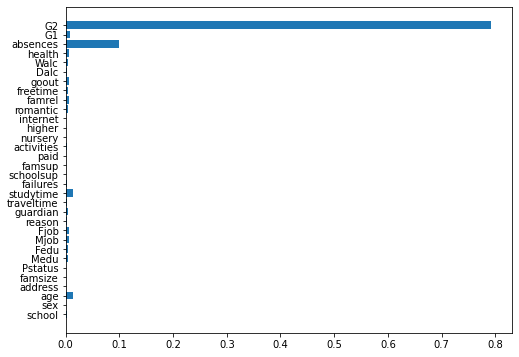

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.barh(X_test.columns, model.feature_importances_)

b) [in Python] SHAP variable importance based on the TreeSHAP algorithm available in the shap package.
What are the differences? Why?

<BarContainer object of 32 artists>

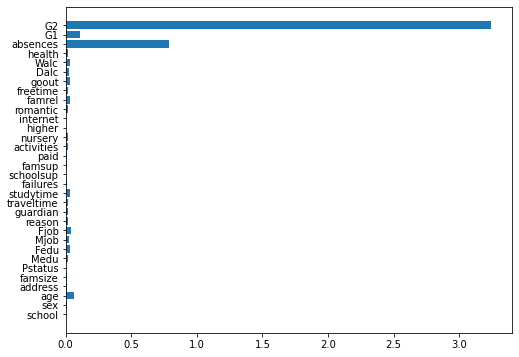

In [ ]:
shap_explainer = shap.explainers.Tree(model, data=X_test)
shap_values = shap_explainer(X_test)
plt.figure(figsize=(8,6))
plt.barh(X_test.columns, np.mean(abs(shap_values.values), axis=0))